## HW 1: Math Foundation and Programming

This assignment intends to:
- Test your Python programming skills
- Understand gradients and backpropagation
- Think classical regression problems with a deep learning mind

- Suppose you have a model $\hat{y} = \sigma(z)$, where: 
    - $ z= w^T x + b,~i.e.~z=w_1*x_1+w_2*x_2+w_3*x_3+ w_4*x_4 + b$, 
    - $\sigma$ is the sigmoid function, i.e. $\sigma(z) = \frac{1}{(1+e^{-z})}$, and
    - $w, b$ are parameters. $b$ is a scalar, $x,w~\in R^4$, specifically, $w = [w_1, w_2, w_3, w_4]^T$, $x = [x_1, x_2, x_3, x_4]^T$.
- Your ground truth lable $y=0~or~1$. With a sample $(x, y)$, You measure your model performance by two possible cost functions:
  - Squared error: $L=\frac{1}{2}(y-\hat{y})^2$
  - Cross entropy: $L=-[y*\ln{\hat{y}}+(1-y)*ln{(1-\hat{y})}]$



Following the instruction below to program your solution in Python notebook step by step carefully:

**Q1**. Write a function to calculate each of the following partial derivatives. The inputs to the function can be all the variables in the model and the returned derivatives are expressions of these variables. An example is given below.
- `g_L_2_z(L, z, y, yhat, func)`: function to calculate $ \frac{\partial{L}}{\partial{z}}$. `func` is the name of the loss function
- `g_z_2_w(z, x, w )`: calculate $ \frac{\partial{z}}{\partial{w}}$
- `g_z_2_b(z, b )`: calculate $ \frac{\partial{z}}{\partial{b}}$

Note, these gradients are very simple. You really don't have to use gradient packages such as PyTorch.autograd. Just define each gradient as an expression of input variables.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
def g_z_2_b():
    
    return 1

def g_z_2_w(x):
    
    # add your code here
    return x


def g_L_2_z(y, yhat, func):
    
    if func=='CrossEntropy':
        
        # add your code here
        return yhat - y
        
    else:
        
        # add your code here
        return ((yhat - y) * yhat * (1 - yhat))
    
def Sigmoid(z):
    return 1 / (1 + np.exp(-z))

def squaredError(y, yhat):
    return 1/2 * np.power((y - yhat), 2)

def crossEntropy(y, yhat):
    return -(y * np.log(yhat) + (1 - y) * np.log(1 - yhat))



**Q2**. Write a forward pass function `forward(x, w, b, func)` to calculate variables $z, \hat{y}, L$, with given $x, y, w, b$

In [3]:
def forward(x, y, w, b, func):
    
    z, yhat, L = None, None, None
    
    # add your code here
    z = np.dot(w.T, x) + b
    yhat = Sigmoid(z)
    if func == 'CrossEntropy':
        L = crossEntropy(y, yhat)
    elif func == 'SquaredError':
        L = squaredError(y, yhat)
        
    return z, yhat, L

**Q3**. Write a function `gradient_desc (v, g, lr)` to adjust a parameter value $v$ by its gradient $g$, i.e. return the new value of parameter $v$ as $v$ $\leftarrow$ $v-lr*g$, where $lr$ is the learning rate.

In [4]:
def gradient_desc(v, dev, lr):
    
    # add your code here
    return v - lr * dev

**Q4**. Write a function `train(x, y, w_0, b_0, func, lr, n)` as follows:
   1. Initialize $w$, $b$ with w_0, b_0
   2. Use a loop of $n$ rounds to do the following
       1. Call the forward function you defined in Q2 to calculate $z, \hat{y}, L$ 
       2. Apply backpropagation to calculate the partial derivatives $\frac{\partial{L}}{\partial{w}}, \frac{\partial{L}}{\partial{b}}$ using the functions you defined in Q1.
       3. Update $w, b$ using the function `gradient_desc` you defined in Q3
       4. record $\hat{y}$, $L$
   3. Return the history of $\hat{y}$, and $L$

In [5]:
def train(x, y, w_0, b_0, func, lr, n):
    
    Yhat, C = None, None
    
    # add your code here
    List_loss = []
    List_prediction = []
    for i in range(n):
        z, yhat, C = forward(x, y, w_0, b_0, func)
        dw = np.dot(g_L_2_z(y, yhat, func), g_z_2_w(x))
        db = np.dot(g_L_2_z(y, yhat, func), g_z_2_b())
        w_0 = gradient_desc(w_0, dw, lr)
        b_0 = gradient_desc(b_0, db, lr)
        List_loss.append(C)
        if y == 1:
            List_prediction.append(yhat / y)
        else:
            List_prediction.append((1-yhat) / (1-y))

    return yhat, C, List_loss, List_prediction, w_0, b_0

**Q5**. Test your program with these two test cases and plot the history of loss $L$ (i.e. learning curves) under different loss functions. An example plot for case A has been given.
   
    


 **Case A**: $x=[1.0,0.5,-1.0, -2.0]^T, y=1, w_0=[-2,-2,1,2]^T, b_0=-1, lr = 0.01$

In [6]:
def test(x, y, w_0_SE, b_0_SE, w_0_CE, b_0_CE, lr, n):
    fig1 = plt.figure(1, figsize = (10, 10))
    ax1 = fig1.add_subplot(211)
    ax2 = fig1.add_subplot(212)

    ax1.set_title('Loss')
    ax2.set_title('Prediction')

    yhat, C, List_loss, List_prediction, w_0_SE, b_0_SE = train(x, y, w_0_SE, b_0_SE, 'SquaredError', lr, n)

    x_plot = np.arange(len(List_loss))
    y1_plot = np.array(List_loss)
    y2_plot = np.array(List_prediction)

    ax1.plot(x_plot, y1_plot, label='SquaredError')
    ax2.plot(x_plot, y2_plot, label='SquaredError')
    ax1.legend(loc='upper right')
    ax2.legend(loc='upper left')

    yhat, C, List_loss, List_prediction, w_0_CE, b_0_CE = train(x, y, w_0_CE, b_0_CE, 'CrossEntropy', lr, n)

    y1_plot = np.array(List_loss)
    y2_plot = np.array(List_prediction)

    ax1.plot(x_plot, y1_plot, label='CrossEntropy')
    ax2.plot(x_plot, y2_plot, label='CrossEntropy')
    ax1.legend(loc='upper right')
    ax2.legend(loc='upper left')

    plt.show()
    
    return w_0_SE, b_0_SE, w_0_CE, b_0_CE

In [7]:
# Case A:

x=np.array([1.0,0.5,-1.0, -2.0])
y=1
w_0=np.array([-2,-2,1,2])
b_0=-1
lr = 0.01
n = 500

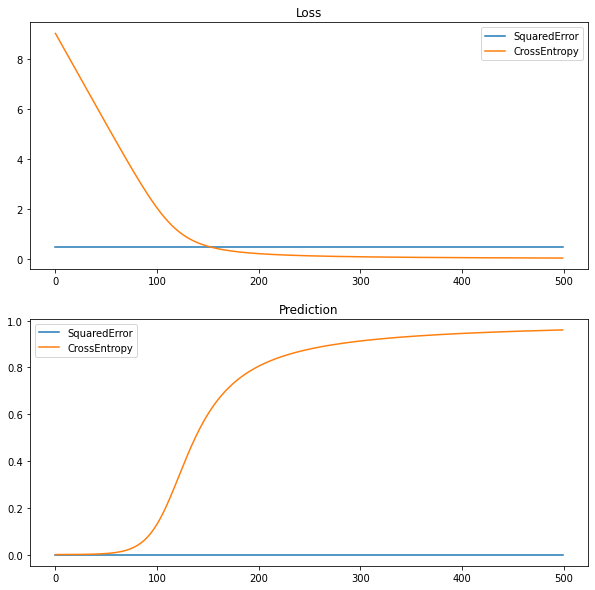

In [8]:
# Add your code here
w_0_SE, b_0_SE, w_0_CE, b_0_CE = w_0, b_0, w_0, b_0
w_0_SE, b_0_SE, w_0_CE, b_0_CE = test(x, y, w_0_SE, b_0_SE, w_0_CE, b_0_CE, lr, n)

**Case B**: $x=[-1.0,-0.5,-1.0, -2.0]^T, y=1, w_0=[-2,-2,1,-2]^T, b_0=-1,  lr = 0.01$

In [9]:
# Case B:

x=np.array([-1.0,-0.5,-1.0, -2.0])
y=0
w_0=np.array([-2,-2,1,-2])
b_0=-1
lr = 0.01
n = 500

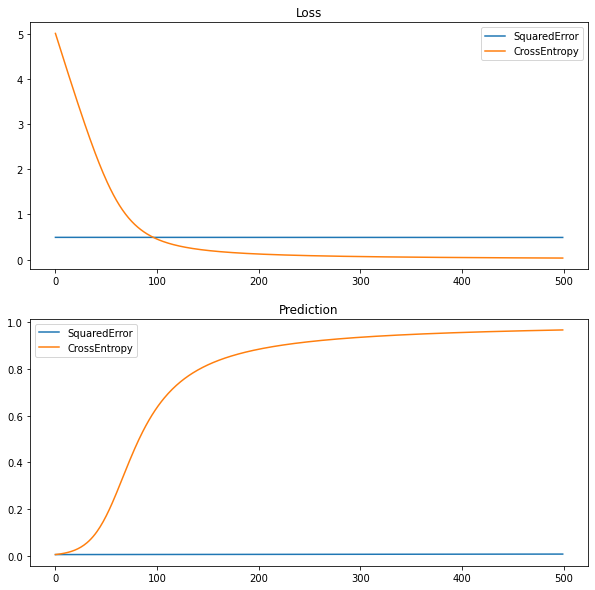

In [10]:

# add your code here
w_0_SE, b_0_SE, w_0_CE, b_0_CE = w_0, b_0, w_0, b_0
w_0_SE, b_0_SE, w_0_CE, b_0_CE = test(x, y, w_0_SE, b_0_SE, w_0_CE, b_0_CE, lr, n)

**Q6**. Carefully observe the learning curves under different loss functions. One difference you can find is the learning curves with Squared Error loss function are flat, shown little progress, and the prediction is alway far away from $y$. Can you explain the differences between these two curves in each plot? Write down your analysis below as markdowns.

**Q7 (Bonus)**. In this experiment, we find that loss functions can have a big impact on the learning curves. Can you enumerate other two decisions or strategies that can improve the learning curves? Implement these strategies in this model and demonstrate their effects clearly. 

In [11]:
# Case A with 0.05 learning rate:

x=np.array([1.0,0.5,-1.0, -2.0])
y=1
w_0=np.array([-2,-2,1,2])
b_0=-1
lr = 0.05
n = 500

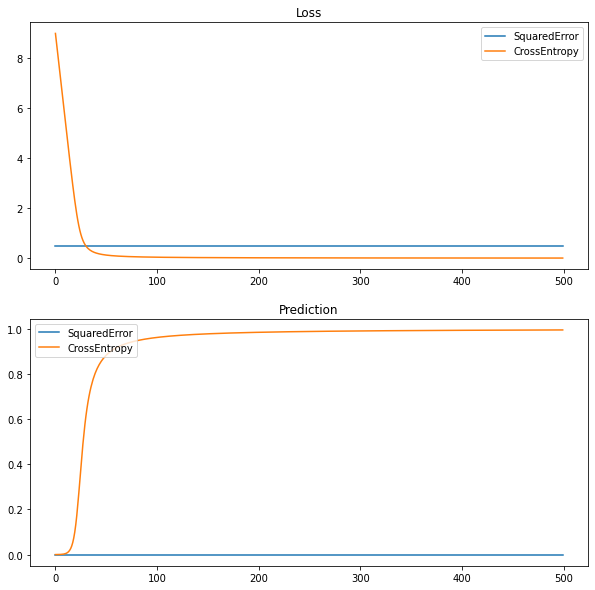

In [12]:
w_0_SE, b_0_SE, w_0_CE, b_0_CE = w_0, b_0, w_0, b_0
w_0_SE, b_0_SE, w_0_CE, b_0_CE = test(x, y, w_0_SE, b_0_SE, w_0_CE, b_0_CE, lr, n)